In [1]:
import numpy as np
import torch
from models import SingleBasisMPS
import matplotlib.pyplot as plt

In [17]:
L=4
local_dim =2
bond_dim = 2

In [3]:
psi = SingleBasisMPS(L=L, local_dim=local_dim, bond_dim=bond_dim)

In [18]:
fname = "datasets/samples_ghz_plus_z_basis_only_L=4_Nmeasure=100000.npy"
xtr = np.load(fname)[:10000,...]

In [19]:
xtr = torch.tensor((xtr + 1)/2).to(torch.long)

In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:
ds = TensorDataset(xtr)

In [20]:
batch_size = 64
epochs = 100

In [21]:
dl = DataLoader(ds, batch_size=batch_size, shuffle=True)

In [22]:
lr = .001
optim = torch.optim.Adam(lr=lr,params=psi.parameters())

In [23]:
costs = []
p10 = []
p01 = []
p0 = []
p1 = []

In [24]:
x10 = torch.tensor([1,0,1,0], dtype=torch.long)
x01 = 1-x10
x0= torch.zeros(1, L,dtype=torch.long)
x1 = torch.ones(1,L,dtype=torch.long)

In [25]:
for n in range(epochs):
    for x, in dl:
        cost = psi.nll_cost(x)
        psi.zero_grad()
        cost.backward()
        optim.step()
    print("finished epoch ", n)
    costs.append(cost)
    p10.append(psi.prob_normalized(x10))
    p01.append(psi.prob_normalized(x01))
    p0.append(psi.prob_normalized(x0))
    p1.append(psi.prob_normalized(x1))

finished epoch  0
finished epoch  1
finished epoch  2
finished epoch  3
finished epoch  4
finished epoch  5
finished epoch  6
finished epoch  7
finished epoch  8
finished epoch  9
finished epoch  10
finished epoch  11
finished epoch  12
finished epoch  13
finished epoch  14
finished epoch  15
finished epoch  16
finished epoch  17
finished epoch  18
finished epoch  19
finished epoch  20
finished epoch  21
finished epoch  22
finished epoch  23
finished epoch  24
finished epoch  25
finished epoch  26
finished epoch  27
finished epoch  28
finished epoch  29
finished epoch  30
finished epoch  31
finished epoch  32
finished epoch  33
finished epoch  34
finished epoch  35
finished epoch  36
finished epoch  37
finished epoch  38
finished epoch  39
finished epoch  40
finished epoch  41
finished epoch  42
finished epoch  43
finished epoch  44
finished epoch  45
finished epoch  46
finished epoch  47
finished epoch  48
finished epoch  49
finished epoch  50
finished epoch  51
finished epoch  52
fin

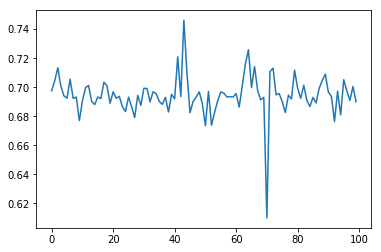

In [26]:
%matplotlib inline
plt.plot(costs)